[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1SNpLrEVeM7-Go18y99J9jaosECpHQ7g2)

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [6]:
def read_data(filename):
    """
    Reads data from the passed-in file, returning a pair of matrices (x, y)
    where each row x[i] is a d-dimensional training point with corresponding
    label y[i].
    """
    data = np.loadtxt(filename, comments='#', delimiter=',')
    # The first column of each row is the label y
    y = data[:,0]
    x = data[:,1:]
    # Add bias column,
    # x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
    return (x, y)

In [7]:
import requests

url_dict = {
    'wine_training1.txt': 'https://drive.google.com/uc?export=download&id=178ewdrScC06GzCV5QzwLNLI6SYjdrGHP',
    'wine_training2.txt': 'https://drive.google.com/uc?export=download&id=16va8tYrEim6ODQo7HJq-oJ2Cd-eOITw2',
    'wine_validation.txt': 'https://drive.google.com/uc?export=download&id=1ml7m8HEeZABtNhgec6nJfb4kVLsFyxlx',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [44]:
# Download files
download_file('wine_training1.txt')
download_file('wine_training2.txt')
download_file('wine_validation.txt')

# Read in training data
x1, y1 = read_data('wine_training1.txt')
x2, y2 = read_data('wine_training2.txt')

# Read in validation data
xvalid, yvalid = read_data('wine_validation.txt')

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [28]:
# functions loss, gradient, and SGD

def loss(X, Y, w):
    '''
    Calculate the log loss function. Using formula from set2.pdf question 1

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    loss = np.mean(np.log(1 + np.exp(-Y * np.dot(X,w))))
    return loss

def gradient(x, y, w, lam, N):
    '''
    Calculate the gradient of the regularized log loss function with respect to
    a single point (x, y), and using weight vector w. Derived in question 1C

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        lam: lambda regularization parameter
        N: Size of data set
    Output:
        The gradient of the loss with respect to x, y, and w.
    '''

    dw = (-y * x) / (np.exp(y * np.dot(w, x)) + 1) + 2 * lam / N * w
    return dw

def SGD(X, Y, w_start, eta, N_epochs, lam):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
    '''

    losses = []
    w = w_start
    N = len(X)
    for i in range(N_epochs):
      random_indices = np.random.permutation(N)
      X = X[random_indices]
      Y = Y[random_indices]
      for i in range(len(X)):
        w -= eta * gradient(X[i], Y[i], w, lam, N)
    return w

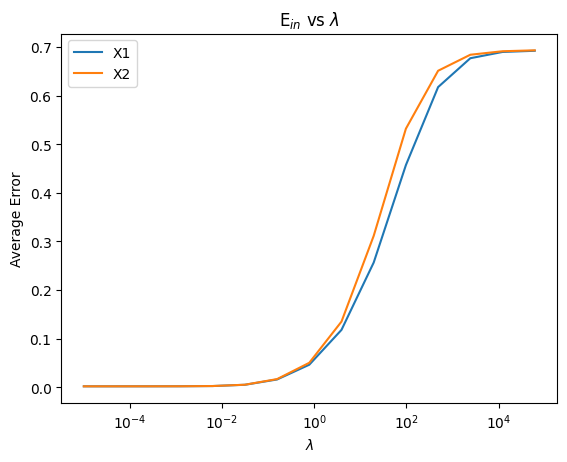

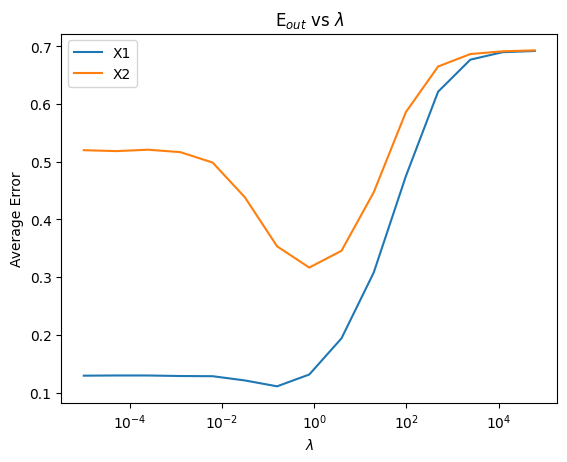

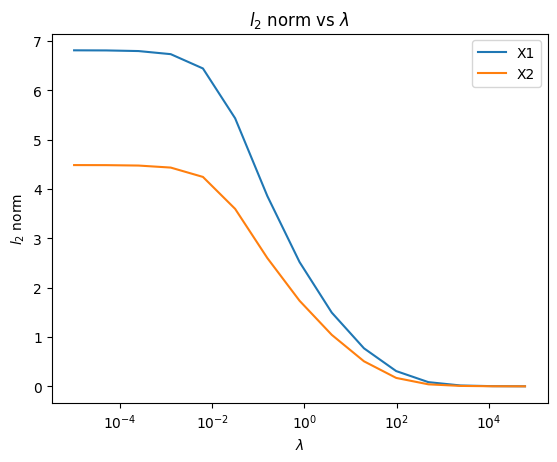

In [47]:
# Normalize training and validation data sets
X1 = (x1 - x1.mean(axis=0)) / x1.std(axis=0)
X2 = (x2 - x2.mean(axis=0)) / x2.std(axis=0)
XV1 = (xvalid - x1.mean(axis=0)) / x1.std(axis=0)
XV2 = (xvalid - x2.mean(axis=0)) / x2.std(axis=0)

# Insert bias term into data sets
X1 = np.insert(X1, 0, 1, axis=1)
X2 = np.insert(X2, 0, 1, axis=1)
XV1 = np.insert(XV1, 0, 1, axis=1)
XV2 = np.insert(XV2, 0, 1, axis=1)

Y1 = y1
Y2 = y2
YV = yvalid

N_epochs = 20000
eta = 0.0005
lambda_start = 0.00001
lambdas = [lambda_start * (5**i) for i in range(15)]
X_features = 14
training_error_X1 = []
training_error_X2 = []
test_error_X1 = []
test_error_X2 = []
l2_norm_X1 = []
l2_norm_X2 = []
for lam in lambdas:
  # Initialize w_0 in loop because np arrays are mutable and will be changed by SGD func
  w_X1 = np.random.randn(X_features) * 0.01
  w_X2 = np.random.randn(X_features) * 0.01
  w_final_X1 = SGD(X1, Y1, w_X1, eta, N_epochs, lam)
  w_final_X2 = SGD(X2, Y2, w_X2, eta, N_epochs, lam)

  training_error_X1.append(loss(X1, Y1, w_X1))
  training_error_X2.append(loss(X2, Y2, w_final_X2))

  test_error_X1.append(loss(XV1, YV, w_final_X1))
  test_error_X2.append(loss(XV2, YV, w_final_X2))

  l2_norm_X1.append(np.linalg.norm(w_final_X1, ord=2))
  l2_norm_X2.append(np.linalg.norm(w_final_X2, ord=2))

plt.figure()
plt.plot(lambdas, training_error_X1)
plt.plot(lambdas, training_error_X2)
plt.xscale('log')
plt.title("E$_{in}$ vs $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("Average Error")
plt.legend(["X1", "X2"], loc = "best")
plt.show()

plt.figure()
plt.plot(lambdas, test_error_X1)
plt.plot(lambdas, test_error_X2)
plt.xscale('log')
plt.title("E$_{out}$ vs $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("Average Error")
plt.legend(["X1", "X2"], loc = "best")
plt.show()

plt.figure()
plt.plot(lambdas, l2_norm_X1)
plt.plot(lambdas, l2_norm_X2)
plt.xscale('log')
plt.title("$l_{2}$ norm vs $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("$l_{2}$ norm")
plt.legend(["X1", "X2"], loc = "best")
plt.show()